# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e Limpeza de Dados</span>

### <span style="color:darkred">Redundância</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Referências:__
- Salvador García, Julián Luengo, Francisco Herrera. Data Processing in Data Mining, 2015.
- Hadley Wickham, Tidy Data. Journal of Statistical Software, v.59, n.10, 2014.
- Katti Faceli; Ana Carolina Lorena; João Gama; André C.P.L.F. Carvalho. Inteligência Artificial: uma abordagem de aprendizado de máquina, 2011.

__Referência complementar:__
- PRATI, Ronaldo C.; BATISTA, Gustavo EAPA; SILVA, Diego F. Class imbalance revisited: a new experimental setup to assess the performance of treatment methods. Knowledge and Information Systems, v. 45, n. 1, p. 247-270, 2015.

***

## Redundância em dados

**Redundância em dados não-estruturados**

Muito comum pois dados binários e textuais possuem elementos que não auxiliam na análise. Exemplos incluem:

- o fundo de imagens e documentos

- timbre em documentos e cartas

- tipos de palavras em textos: artigos, conjunções, etc.


**Redundância em dados estruturados**

Diretamente relacionada a:
1. linhas/instâncias com valores repetidos (duplicados) 
2. colunas/atributos com valores constantes (iguais para todas as instâncias)
3. colunas/atributos com alta correlação

Nesse notebook tratar apenas de *dados estruturados*

## Dados duplicados ou constantes

Bases de dados que contém informações repetidas ou atributos irrelevantes para obter as respostas que se espera da análise.

A redundância pode atrapalhar no projeto de modelos de aprendizado e estatísticos pois a quantidade de exemplos pode influenciar no viés do modelo.

**Redundância em bases de dados estruturadas**:

* Registros duplicados

* Atributos com valores iguais em todas as observacoes


Vamos carregar uma base de dados para mostrar exemplos

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/people_prof_relig.csv")
data.dtypes

Name                object
Sex                 object
Year of Birth        int64
Country of Birth    object
Religion            object
City                object
Profession          object
Age                  int64
Experience           int64
Salary               int64
dtype: object

In [6]:
data.head()

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
0,Eugenio Ewell,M,1968,USA,Christian,New Orleans,Nurse,53,21,4140
1,Ivo Izidro,M,1988,Mexico,Christian,Acapulco,Nurse,33,2,2709
2,Lindsey Lever,M,1965,USA,Christian,New Orleans,Nurse,56,37,7896
3,Desiree Dardar,F,1995,USA,Christian,New Orleans,Nurse,26,1,2580
4,Mariann Mulero,F,1973,USA,Christian,New Orleans,Nurse,48,16,3668


**Linhas/registros duplicados**

O tipo mais comum de dados redundantes são as linhas ou registros duplicados, ou seja, aquelas que possuem todos os valores de atributos iguais.

In [7]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [8]:
data[data.duplicated()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
33,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
61,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
68,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677


A consulta acima mostra apenas as linhas "extra", ou seja, as duplicadas encontradas após a ocorrência da primeira linha original.

Assim, ao consultar por um dos nomes que temos acima duplicados, veremos que há duas linhas para ele, sendo a duplicada considerada a linha 51.

In [9]:
data[data['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300


Podemos usar a opção `keep` para manter todas as duplicatas, mostrando seus valores

In [10]:
data[data.duplicated(keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
18,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677
19,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
33,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
51,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300
61,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
68,Ricardo Rima,M,1977,Peru,Christian,Arequipa,Nurse,44,16,6677


Felizmente, temos uma funcão pronta para remover duplicatas de dataframes, `drop_duplicates()`, na qual podemos manter a primeira ocorrência da linha duplicada: `first`, a última: `last`, ou remover todas as que aparecem duplicadas: `False`.

In [11]:
d_ndup = data.drop_duplicates(keep='first')
d_ndup[d_ndup['Name']=='Carlos Cobre']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
13,Carlos Cobre,M,1983,Brazil,Christian,São Paulo,Nurse,38,15,6300


In [12]:
d_ndup[d_ndup.duplicated(keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary


---

**Duplicidade em atributos**

A duplicidade pode gerar problemas quando aparece isolada em determinado atributo. 

Nessa base de dados um atributo que pode ser sensível a isso é o nome

In [13]:
d_ndup.duplicated(['Name'])

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 96, dtype: bool

In [14]:
d_ndup[d_ndup.duplicated(['Name'], keep=False)]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Age,Experience,Salary
19,Apolonia Abler,F,1967,Canada,Christian,Vancouver,Nurse,54,35,7141
93,Apolonia Abler,F,1967,Australia,Christian,Brisbane,Nurse,54,23,5496


Notamos que, apesar de ter o mesmo nome, sexo e ano de nascimento, as duas pessoas nasceram em países diferentes e portanto não há redundância ou dados duplicados a remover.

---
**Atributos constantes**

Investigando os atributos Profession e Religion, mostrando seus histogramas, notamos que todas as linhas tem o mesmo valor para esses atributos.

Apesar do valor informativo, ao construir modelos computacionais, por exemplo classificadores, esses atributos representam um aumento na dimensionalidade sem contribuir para a tarefa principal, classificação.

Podemos usar o método `nunique()` para obter a contagem de valores distintos

In [17]:
d_ndup.nunique()

Name                95
Sex                  2
Year of Birth       39
Country of Birth    10
Religion             1
City                10
Profession           1
Age                 39
Experience          37
Salary              95
dtype: int64

In [15]:
att_const = np.array(d_ndup.columns[d_ndup.nunique() <= 1])
print(att_const)

['Religion' 'Profession']


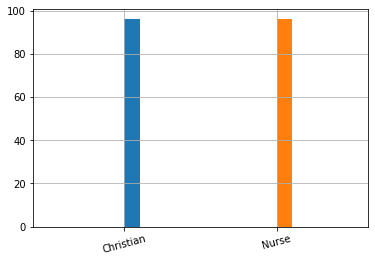

In [16]:
for att in att_const:
    d_ndup[att].hist(xrot=15)

In [16]:
d_ndup[att_const]

,Religion,Profession
0,Christian,Nurse
1,Christian,Nurse
2,Christian,Nurse
3,Christian,Nurse
4,Christian,Nurse
...,...,...
95,Christian,Nurse
96,Christian,Nurse
97,Christian,Nurse
98,Christian,Nurse


In [28]:
data_nred = d_ndup.drop(att_const, axis=1)

In [30]:
data_nred.sample(6)

,Name,Sex,Year of Birth,Country of Birth,City,Age,Experience,Salary
63,Alton Thornton,M,1994,Canada,Vancouver,27,2,5121
98,Diego Colque,M,1958,Peru,Arequipa,63,33,5725
96,Petra Cruz,F,1976,Mexico,Acapulco,45,17,602
41,Donnie Adkins,M,1962,Spain,Valencia,59,27,3247
21,Marcos Magro,M,1989,Brazil,São Paulo,32,8,3457
50,Lorraine Richards,F,1992,Brazil,São Paulo,29,4,3683


## Atributos correlacionados

Alguns atributos podem estar altamente correlacionados com outros. Esses atributos oferecem pouca contribuição no sentido de melhorar o que sabemos sobre o conjunto de dados. 

Ainda, quando se trata de treinar modelos podemos incorrer em maior custo computacional ou problemas de convergência.

Uma ferramenta interessante para entender *dependências lineares* entre atributos é a correlação.

No entanto, a correlação só é computada com valores numéricos.

In [31]:
mat_corr = data_nred.corr()
mat_corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,-1.000000,-0.908208,-0.362197
Age,-1.000000,1.000000,0.908208,0.362197
Experience,-0.908208,0.908208,1.000000,0.432904
Salary,-0.362197,0.362197,0.432904,1.000000


Características da matriz de correlação:
- valores negativos indicam correlação inversa
- tem diagonal igual a 1 (auto-correlação)
- é simétrica

Vamos considerar como alta correlação atributos com valores iguais ou superiores a 0.95

Para facilitar:
- pegamos o valor absoluto da correlação, 
- consideramos apenas a matriz triangular superior - devido a simetria, e
- não incluimos a diagonal principal (para a qual todos os valores são 1)

In [32]:
mat_corr = np.abs(mat_corr)
mat_corr

,Year of Birth,Age,Experience,Salary
Year of Birth,1.000000,1.000000,0.908208,0.362197
Age,1.000000,1.000000,0.908208,0.362197
Experience,0.908208,0.908208,1.000000,0.432904
Salary,0.362197,0.362197,0.432904,1.000000


In [33]:
# o parametro k indica para nao incluir a diagonal principal
mask_tri = np.triu(np.ones(mat_corr.shape),k=1).astype(np.bool)
print(mask_tri)

[[False  True  True  True]
 [False False  True  True]
 [False False False  True]
 [False False False False]]


<ipython-input-33-e0335c7d7cf5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_tri = np.triu(np.ones(mat_corr.shape),k=1).astype(np.bool)


In [34]:
tri_sup = mat_corr.where(mask_tri)
print(tri_sup)

               Year of Birth  Age  Experience    Salary
Year of Birth            NaN  1.0    0.908208  0.362197
Age                      NaN  NaN    0.908208  0.362197
Experience               NaN  NaN         NaN  0.432904
Salary                   NaN  NaN         NaN       NaN


Para cada coluna das colunas da matriz triangular nas quais qualquer valor seja maior ou igual a 0.95

In [35]:
atrib_altacor = [col for col in tri_sup.columns if any( [col] >= 0.95)]

In [36]:
atrib_altacor

['Age']

In [37]:
data_clean = data_nred.drop(data_nred[atrib_altacor], axis=1)

In [38]:
data_clean.sample(10)

,Name,Sex,Year of Birth,Country of Birth,City,Experience,Salary
24,Herta Hatley,F,1988,USA,New Orleans,1,4337
89,Ezequiel Anthony,M,1985,USA,New Orleans,17,5943
40,Billie Duncan,F,1976,Scotland,Edinburgh,9,2391
54,David Pittman,M,1987,Australia,Brisbane,9,2242
34,Shelley Mendoza,F,1978,Scotland,Edinburgh,7,5564
5,Kathey Kleiman,F,1973,USA,New Orleans,20,6905
3,Desiree Dardar,F,1995,USA,New Orleans,1,2580
69,Andre Logan,M,1981,USA,New Orleans,17,847
32,Esther Morgan,F,1991,Australia,Brisbane,1,1543
11,Mayra Mcnish,F,1987,Scotland,Edinburgh,11,4818


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              100 non-null    object
 1   Sex               100 non-null    object
 2   Year of Birth     100 non-null    int64 
 3   Country of Birth  100 non-null    object
 4   Religion          100 non-null    object
 5   City              100 non-null    object
 6   Profession        100 non-null    object
 7   Age               100 non-null    int64 
 8   Experience        100 non-null    int64 
 9   Salary            100 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [40]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              96 non-null     object
 1   Sex               96 non-null     object
 2   Year of Birth     96 non-null     int64 
 3   Country of Birth  96 non-null     object
 4   City              96 non-null     object
 5   Experience        96 non-null     int64 
 6   Salary            96 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 6.0+ KB
